In [28]:
from PIL import Image
import numpy as np
import math

img = np.asarray(Image.open('/content/data_1.png').convert('RGB'))

img.shape



(1082, 811, 3)

# New Section

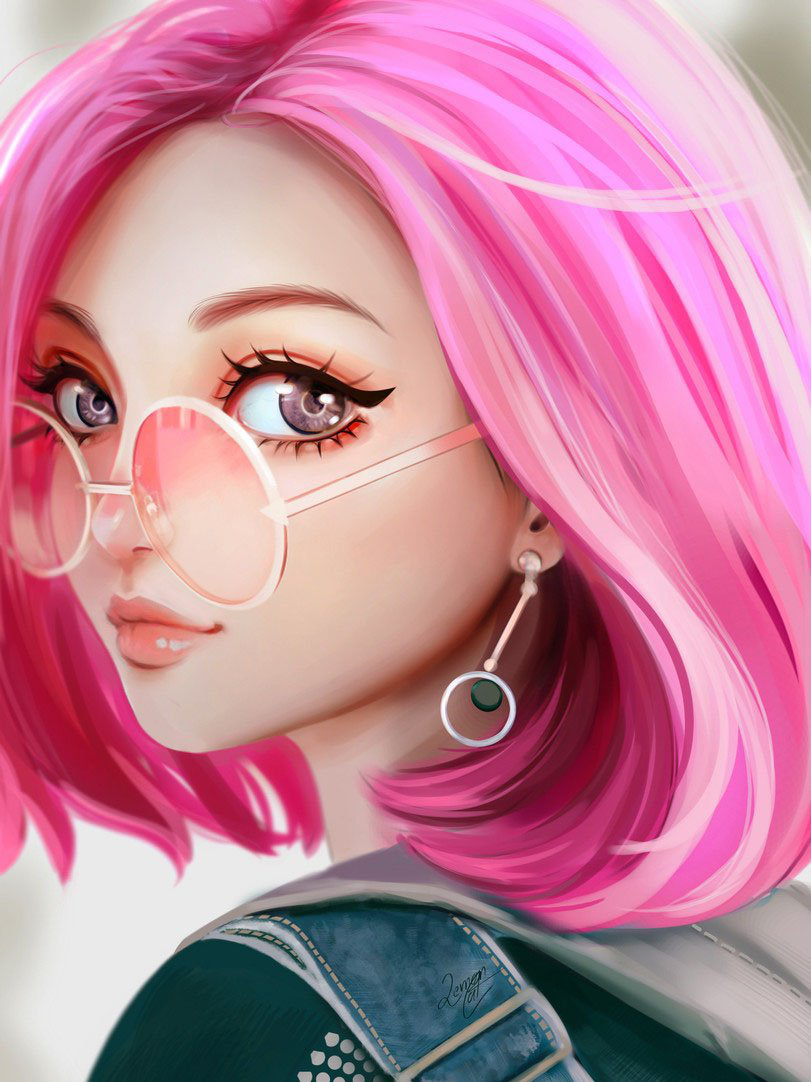

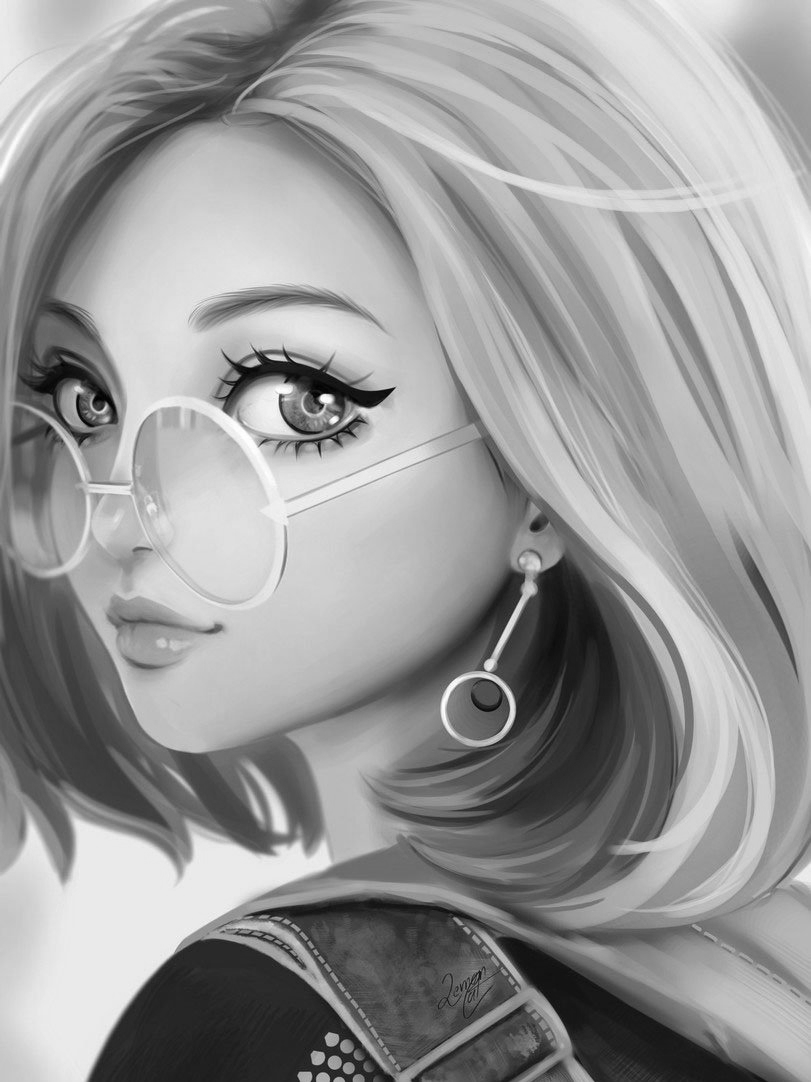

In [29]:
img_semi = (0.3 * img[:, :, 0] + 0.59 * img[:, :, 1] + 0.11 * img[:, :, 2]).astype(np.uint8)
Image.fromarray(img).show()
Image.fromarray(img_semi).show()


In [30]:
freq_hist = [0 for i in range(256)]

for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    middle = 0
    for z in range(img.shape[2]):
      middle += img[x][y][z]
    freq_hist[math.floor(middle/3)] += 1
res = sum(freq_hist)


In [31]:
freq_hist_otn = np.zeros(256, dtype=float)
for i in range(len(freq_hist)):
  freq_hist_otn[i] = freq_hist[i] / res
t_max = float(0)
t_res = float(0)
for t in range(256):
  w0 = float(0)
  w1 = float(0)
  m0 = float(0)
  m1 = float(0)
  d0 = float(0)
  d1 = float(0)
  d_all = float(0)
  d_class = float(0)
  for i in range(t+1):
    w0 += freq_hist_otn[i]
  w1 = 1 - w0
  for i in range(256):
    if i <= t:
      m0 += (i * freq_hist_otn[i])/(w0)
    else:
      m1 += (i * freq_hist_otn[i])/(w1)
  for i in range(256):
    if i <= t:
      d0 += freq_hist_otn[i] * (( i - m0)**2)
    else:
      d1 += freq_hist_otn[i] * (( i - m1)**2)

  d_all = w0 * d0 + w1 * d1
  d_class = w0 * w1 * ((m0 - m1)**2)
  # print(d_all, d_class)

  tmp = d_class / d_all
  # print(tmp)

  # tmp = d_class

  if  tmp > t_max:
    t_max = tmp
    t_res = t
t_res

148

In [32]:
img_monochrome = np.empty(img.shape)

for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    for z in range(img.shape[2]):
      if (sum(img[x][y]) // 3) < t_res:
        img_monochrome[x][y] = [0, 0, 0]
      else:
        img_monochrome[x][y] = [255, 255, 255]





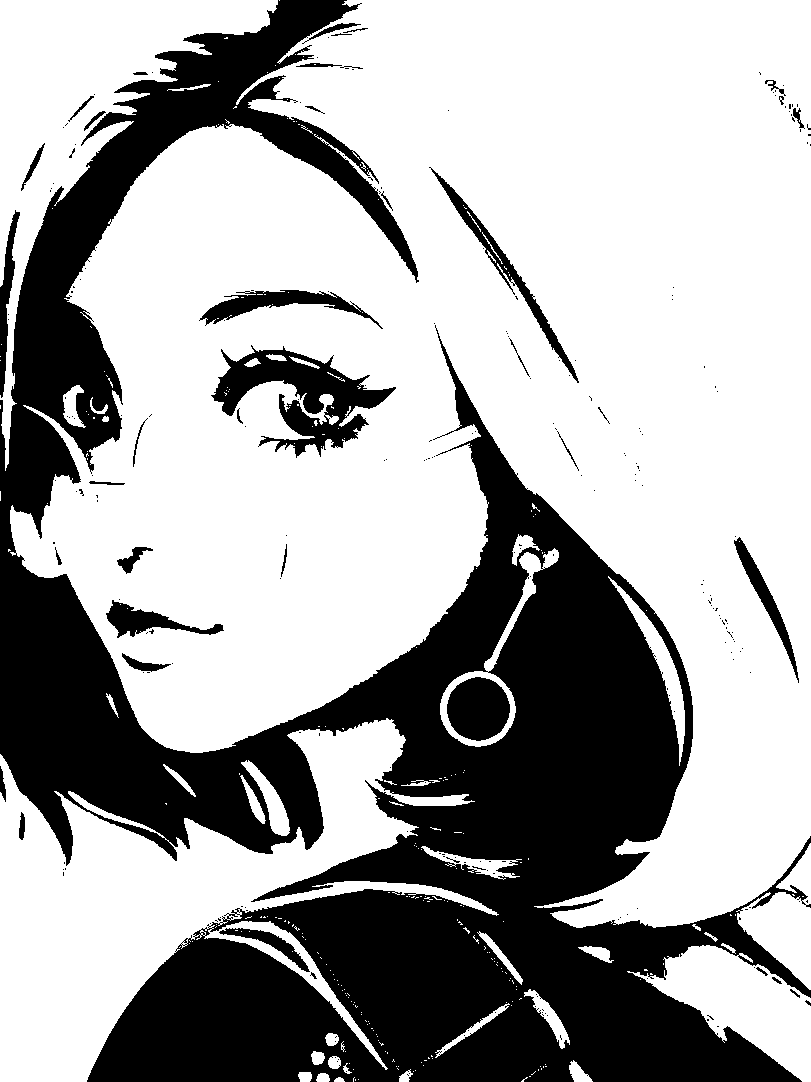

In [33]:
Image.fromarray(img_monochrome.astype(np.uint8), mode='RGB').show()

In [ ]:
# Создать гистограмму относительных частот, взять какой-либо шаг
# С помощью формул найти пороговое значение яркости как максимум отношения дисперсий, пропустить через все эти формулы каждое значение из массива гистограммы
# Заменить цвета пикселей